In [189]:
# -*- coding: utf-8 -*-

'''
moc^2 = rest energy of electron = 511 keV
tita  = angle between incident and scattered gamma rays

planck constant
h = 6.62606957 × 10-34 m2 kg / s
h =  4.135667516 x 10-15 eV*s
c = 299792458 m / s

1 J = 6241509647120.4 MeV
1 eV = 1.602176487E-19 J
1 MeV = 1.602176487E-13 J

E = hc/wavelength
freq = c/wavelength


Compton wavelength: h/mec = 2.43 x 10-12 m comptonWl
me: masa del electron
    9.10938215(45)×10−31 Kg
re: radio del electrón
    2.818x10-15 m


1 barn = 10-28 m2 = 10-24 cm2

'''

class Units:
    comptonWl =  2.43e-12
    c = 299792458
    hmk = 6.62606957e-34
    hev = 4.135667516e-15
    me =  9.10938215e-31
    re = 2.818e-15
    barn = 10e-28 #m2
    re2 = re * re # m2
    

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def energy(angle, E=0.511):
    return 0.511 / (1 + (1 - np.cos(angle)*E/0.511))

def kn(angle, E0=0.511): # E en Mev
    E = energy(angle, E0)
    return (Units.re ** 2/2) * ((E/E0) ** 2)*(E/E0 + E0/E - np.sin(angle) ** 2)

def kn_knoll (angle, E=511): #E in Kev
    alfa = E / 511
    t1 = 1 - np.cos(angle)
    t2 = 1 + np.cos(angle) ** 2
    t3 = t2/2
    t4 = 1/(1 + alfa *t1)**3
    t5 = (1 + (alfa**2 * (t1**2))/(t2*(1 + alfa * t1)))
    
    return ((Units.re ** 2/2) * t4 * t3 * t5)
    

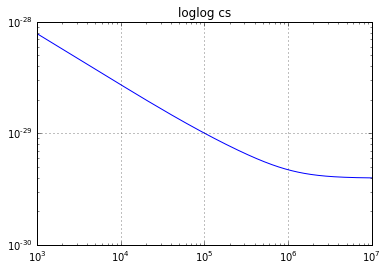

In [227]:
if __name__ == "__main__":
    angle = np.linspace(0, np.pi, 100)
    energies = np.linspace(0.001*1e6,10 * 1e6,1000)
    cs = np.zeros_like(energies)
    
    i = 0
    for e in energies:
        dcs_10 = kn_knoll(angle , e).sum()
        cs[i] = dcs_10
        i = i + 1
        
        
    
    # log x and y axis
    plt.subplot(111)
    plt.loglog(energies, cs, basex=10)
    plt.grid(True)
    plt.title('loglog cs')   

    plt.show()

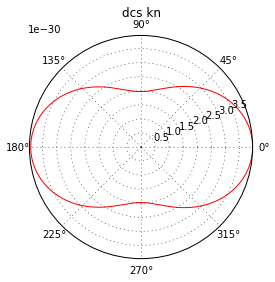

In [87]:
ax = plt.subplot(111, polar=True)
ax.plot(angle, dcs_10, color='r', linewidth=1)
ax.set_rmax(dcs.max())
ax.grid(True)

ax.set_title("dcs kn", va='bottom')
plt.show()


## Photon Cross Section

#### Energy|Cohe_Scat|Inco_Scat|Pho_Absr|Nuc_PrPrd|Elc_PrPrd|Tot_wCohe|Tot_sCohe|

Photon cross section data for a single element, compound, or mixture [link](http://physics.nist.gov/PhysRefData/Xcom/html/xcom1-t.html)

### Datos para el INa

* #### I: Z = 53 %W 0.84627 dens 4.93 g/cm3
* #### Na: Z = 11 %W 0.153373 dens 0.97 g/cm3

* #### NaI: dens = 4.3224 g/cm3


In [197]:
densNa = 0.97
pcNa = 0.15373
densI  = 4.93
pcI = 0.84627
densNaI = densNa * pcNa + densI * pcI
print(densNaI)

4.321229199999999


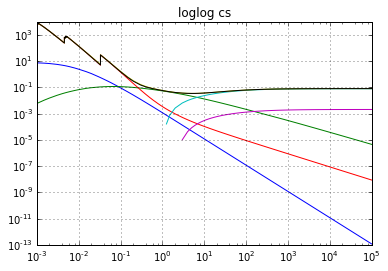

In [198]:
import csv

rows=[]

with open('xcom_ina.pl') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='|')
    for row in reader:
        # http://stackoverflow.com/questions/14813396/python-elegant-way-to-delete-empty-lists-from-python-dict
        rows.append({k:v for k,v in row.items() if v})

reader.fieldnames = reader.fieldnames[:-1]        
n_fields = len(reader.fieldnames)
n_data = len(rows)

import numpy as np

cs = np.zeros(n_fields * n_data).reshape(n_data, n_fields)

i = 0
for r in rows:
    cs[i] = np.asarray([r[f] for f in reader.fieldnames])
    i = i + 1

# log x and y axis
plt.subplot(111)
for i in range(1, n_fields):
    plt.loglog(cs[:,0], cs[:,i], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

##  Total

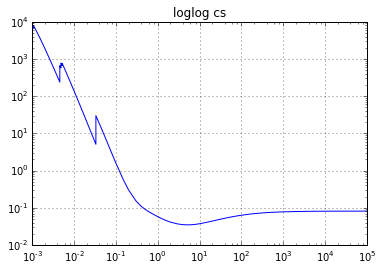

In [199]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,7], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

## Mean Free Path

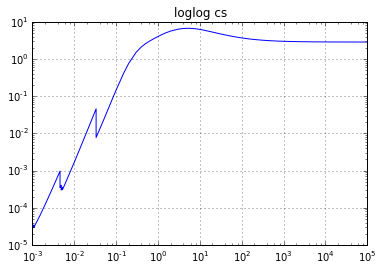

2.92007110615e-05 6.66519686527 2.70212609335


In [202]:
mfp = 1/(cs[:,7] * densNaI)

# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], mfp, basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()
print(mfp.min(), mfp.max(), mfp.mean())

## Absorción fotoeléctrica

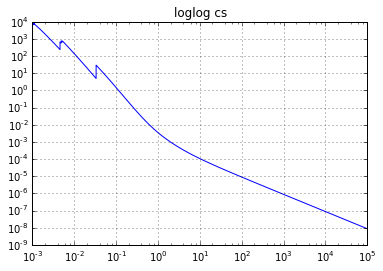

In [179]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,3], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

## Producción de pares

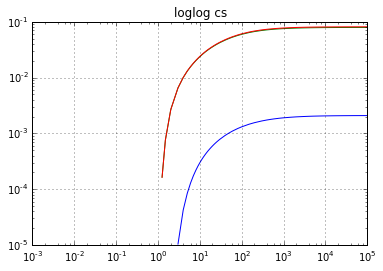

In [182]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,5], basex=10)
plt.loglog(cs[:,0], cs[:,4], basex=10)

plt.loglog(cs[:,0], cs[:,5]+cs[:,4], basex=10)


plt.grid(True)
plt.title('loglog cs')   

plt.show()

## Incoherent scatering - Compton

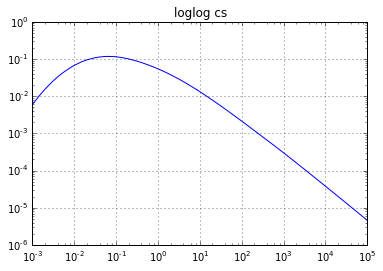

In [183]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,2], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

In [226]:
# interpolar
# >>> xp = [1, 2, 3]
# >>> fp = [3, 2, 0]
# >>> np.interp(2.5, xp, fp)
lambda_ = np.interp(1, cs[:,0], mfp)

N = 10000
s = - lambda_ * np.log(np.random.random(size=N))
u = 2*np.random.random(size=N) - 1

x = s *u

print(x[x>5].size)
print(x[x<0].size)


511
5006
